## Introduction to Scikit-Learn

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Get the data ready
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create Y (labels)
y = heart_disease["target"]

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [7]:
# Fit the model - the model finding patterns in the training data
clf.fit(X_train, y_train);

In [8]:
# make a prediction
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [9]:
# 4. Evaluate the model on the training and test data
clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.7704918032786885

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68        23
           1       0.80      0.84      0.82        38

    accuracy                           0.77        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.77      0.77      0.77        61



In [12]:
confusion_matrix(y_test, y_preds)

array([[15,  8],
       [ 6, 32]], dtype=int64)

In [13]:
accuracy_score(y_test, y_preds)

0.7704918032786885

In [14]:
# 5. Improve a model
# Try different amount of estimators
np.random.seed(0)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators
Model accuracy on test set: 72.13%

Trying model with 20 estimators
Model accuracy on test set: 75.41%

Trying model with 30 estimators
Model accuracy on test set: 78.69%

Trying model with 40 estimators
Model accuracy on test set: 75.41%

Trying model with 50 estimators
Model accuracy on test set: 72.13%

Trying model with 60 estimators
Model accuracy on test set: 73.77%

Trying model with 70 estimators
Model accuracy on test set: 75.41%

Trying model with 80 estimators
Model accuracy on test set: 73.77%

Trying model with 90 estimators
Model accuracy on test set: 75.41%



In [15]:
# 6. Save a model and load it 
import pickle
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [16]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.7540983606557377

## 1. Getting our data ready to be used with machine learning
Three main things we have to do:
    
        1. Split the data into features and labels(usually `X` and `y`)
        2. Filling (also called imputing) or disregaring missing values
        3. Converting non-numerical values to numerical values (also called feature encoding)

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
# Split the data into training data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## 1.1  Make sure all data is numerical

In [22]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [23]:
len(car_sales)

1000

In [24]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [25]:
# Split into X and y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [27]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [28]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features =["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [29]:
pd.DataFrame(transformed_X)[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [30]:
dummies = pd.get_dummies(car_sales[["Make", "Doors", "Colour"]])
dummies[:5]

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [31]:
# Refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train);

In [32]:
# Evaluate
model.score(X_test, y_test)

0.3235867221569877

## 1.2 What if there are missing values?

1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether

In [33]:
# Import the data
car_sales_missing = pd.read_csv("data/car-sales-missing-data.csv")
car_sales_missing.head(12)

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [34]:
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [35]:
car_sales_missing["Odometer"].value_counts()

31600.0     1
213095.0    1
60000.0     1
150043.0    1
11179.0     1
87899.0     1
Name: Odometer, dtype: int64

In [36]:
# Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [37]:
# Convert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features =["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [ ]:
pd.DataFrame(transformed_X)

### Option 1: Fill missing data with Pandas

In [ ]:
# Fill the "Make" column 
car_sales_missing["Make"].fillna("missing", inplace = True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace = True)

# Fill the "Odometer (KM)" column 
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(), inplace = True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace = True)

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
car_sales_missing["Odometer"] = car_sales_missing["Odometer"].round(2)

In [38]:
car_sales_missing.head(12)

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [39]:
# Remove rows with missing value
car_sales_missing.dropna(inplace=True)

In [40]:
car_sales_missing.head(12)

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [41]:
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       0
dtype: int64

In [42]:
len(car_sales_missing)

4

In [43]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [44]:
# Convert data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features =["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                                 remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 150043.0, '$4,000'],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 87899.0, '$5,000'],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 11179.0, '$22,000'],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 213095.0, '$3,500']],
      dtype=object)

In [45]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,150043.0,"$4,000"
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,87899.0,"$5,000"
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,11179.0,"$22,000"
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,213095.0,"$3,500"


### Option 2: Fill missing values with Scikit-Learn

In [46]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

In [50]:
# Check the missing values
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [51]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test data separately
# fit_transform imputes the missing values from the training set and fills them simultaneously
filled_X_train = imputer.fit_transform(X_train) 
# tranform takes the imputing missing values from the training set and fills the test set with them
filled_X_test = imputer.transform(X_test) 

# Check filled X_train
filled_X_train

array([['Toyota', 'Black', 4.0, 86696.0],
       ['Toyota', 'Black', 4.0, 20714.0],
       ['Toyota', 'White', 4.0, 134415.0],
       ...,
       ['Honda', 'Blue', 4.0, 224900.0],
       ['missing', 'White', 3.0, 19482.0],
       ['Honda', 'Blue', 4.0, 199833.0]], dtype=object)

In [52]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [53]:
# Check missing data in test set
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [54]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [55]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_X_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
# transformed_X_train.toarray()

In [56]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.09497633411335504

## 2. Choosing the right estimator or algorithm for our problem
 Scikit-Learn uses estimator as another term for machine learning model or algorithm
* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

### 2.1 Picking a machine learning model for a regression problem

In [3]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [4]:
# Get the data into a pandas dataframe for good visualition

boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# How many samples
len(boston_df)

506

In [60]:
# Trying the Ridge Regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(33)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instantiate the ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.6833396417695794

How do we improve this score?

What if Ridge Regression wasn't working 

In [6]:
# Try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(10)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data into trian and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check for the score of the random forest regressor
model.score(X_test, y_test)

NameError: name 'train_test_split' is not defined

### 2.2 Choose an estimator for a classification problem
`Note`: 
    
    * If you have structured data, use ensemble methods
    * If you have unstructured data, use deep learning or transfer learning

In [62]:
# Get the data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head();

In [63]:
# Check for null values in the data
heart_disease.isna().sum();

In [64]:
# Check for the length of the data
len(heart_disease)

303

In [65]:
# heart_disease.head(10)

In [66]:
# Trying using SVM model
from sklearn import svm 

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model 
clf = svm.SVC()
clf.fit(X_train, y_train)

# Check the score of the model
clf.score(X_test, y_test)

0.6557377049180327

In [74]:
# Using linear svc
# from sklearn.svm import LinearSVC

# np.random.seed(42)

# # Create X and y
# X = heart_disease.drop("target", axis=1)
# y = heart_disease["target"]

# # Split into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Instantiate the model 
# clf = LinearSVC(max_iter=10000000)
# clf.fit(X_train, y_train)

# # Check the score of the model
# clf.score(X_test, y_test)

In [75]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check the score of the model
clf.score(X_test, y_test)

0.8524590163934426

## 3. Fit the model/algorithm on the data and use it to make predictions

### 3.1 Fitting the model

In [76]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model (find the patterns in the dataset - training the machine learning model)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check the score of the model (Use the patterns the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Make predictions using the machine learning model
2 ways to make predictions:
    1. `predict()`
    2. `predict_proba()`

In [77]:
# Use a trained model to make predictions
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [78]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [79]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [80]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

 Make predictions with `predict_proba()`

In [82]:
# predict_proba returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [83]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict` can also be used for regression models

In [84]:
# Try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(10)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data into trian and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check for the score of the random forest regressor
model.score(X_test, y_test)

0.8621300248033641

In [85]:
# Make predictions
y_preds = model.predict(X_test)

In [86]:
y_preds[:10]

array([24.929, 29.174, 25.804, 28.951, 18.393, 15.041, 45.169, 15.347,
       20.814, 46.461])

In [87]:
np.array(y_test[:10])

array([28.4, 31.1, 23.5, 26.6, 19.6, 14.3, 50. , 14.3, 20.7, 37.6])

In [88]:
# Compare the truths
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.691519607843138

## 4. Evaluating a machine learning model
Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric funtions

### 4.1 Evaluate a model with the `score` method

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(44)

# Get the data
heart_disease = pd.read_csv("data/heart-disease.csv")

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.819672131147541

In [90]:
clf.score(X_train, y_train)

1.0

In [17]:
# Try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(10)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data into trian and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check for the score of the random forest regressor
model.score(X_test, y_test)

0.8621300248033641

### 4.2 Evaluating using the `scoring` method

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
np.random.seed(44)

# Get the data
heart_disease = pd.read_csv("data/heart-disease.csv")

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train);

In [92]:
clf.score(X_test, y_test)

0.819672131147541

In [93]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.83870968, 0.83870968, 0.93333333, 0.9       ,
       0.83333333, 0.76666667, 0.83333333, 0.73333333, 0.76666667])

In [94]:
np.random.seed(22)

# Single training and test split
clf_single_score = clf.score(X_test, y_test)

# Mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.819672131147541, 0.8183060109289617)

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [95]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(22)

X = heart_disease.drop("target", axis=1)
y =heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

clf_cross_val_score = cross_val_score(clf, X, y, cv=5);

In [96]:
np.mean(clf_cross_val_score)

0.8281420765027322

In [97]:
print(f"Heart Disease Classifier Cross Validated Accuracy is: {np.mean(clf_cross_val_score) * 100:.2f}% ")

Heart Disease Classifier Cross Validated Accuracy is: 82.81% 


**Area under receiver operating characteristic curve (AUC/ROC)**
* Area Under Curve (AUC)
* ROC Curve

ROC curves are a comparison of a model's true positive rate (tpr) versus false positive rate (fpr)
* True positive = model precits 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [98]:
# Create X_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [99]:
from sklearn.metrics import roc_curve

# Fit the model
clf.fit(X_train, y_train)

# Make predictions with probabilites
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.04, 0.96],
       [0.89, 0.11],
       [0.12, 0.88],
       [0.98, 0.02],
       [0.88, 0.12],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.59, 0.41],
       [0.01, 0.99],
       [0.25, 0.75]])

In [100]:
np.array(y_test[:10])

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [101]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.96, 0.11, 0.88, 0.02, 0.12, 0.64, 0.05, 0.41, 0.99, 0.75])

In [102]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03030303, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.12121212, 0.15151515, 0.15151515, 0.18181818,
       0.18181818, 0.24242424, 0.24242424, 0.3030303 , 0.33333333,
       0.51515152, 0.51515152, 0.57575758, 0.60606061, 0.6969697 ,
       0.84848485, 0.90909091, 1.        ])

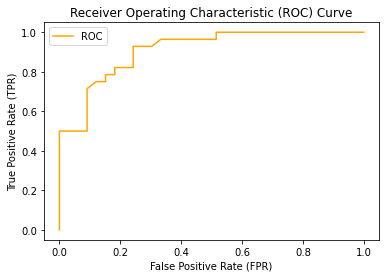

In [103]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt


def plot_roc(fpr, tpr):
    """
    Plots ROC curve given the false positive rate (fpr) and
    true positive rate (tpr) of a model.
    """
#     Plot ROC curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
#     Plot line with no predictive power (baseline)
#     plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
#     Customize plot
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc(fpr, tpr)

In [104]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9090909090909092

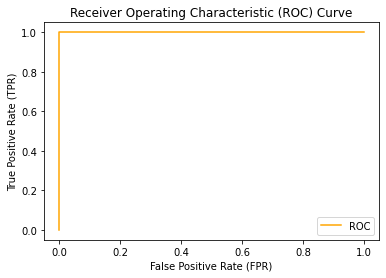

In [105]:
# Plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc(fpr, tpr)

In [106]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**
* A confusion matrix is a quick way to compare the labels a model predicts and the actual label it was supposed to predict
* In essence giving you an idea of where the model is getting confused

In [107]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  9],
       [ 2, 26]], dtype=int64)

In [108]:
# Visualize the confusion matrix with crosstab
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,9
1,2,26


<AxesSubplot:>

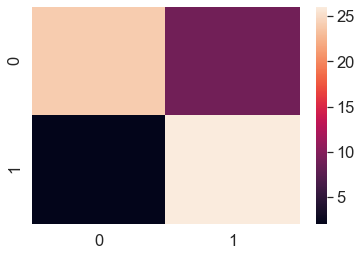

In [109]:
# Make confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat)

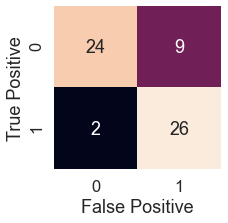

In [113]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False)
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
plot_conf_mat(conf_mat)

**Classification Report**

In [114]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.74      0.93      0.83        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.84      0.82      0.82        61



### 4.2 Regression Model Evaluation Metrics
1. R^2 or coefficient of determination
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

**R^2**

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train);
model.score(X_test, y_test)

0.8490741551646207

**Mean Absolute Error(MAE)**

In [8]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

1.8901764705882358

In [9]:
df = pd.DataFrame(data = {"actual values":y_test,
                          "predicted values":y_preds})
df[:10]

,actual values,predicted values
173,23.6,22.641
274,32.4,31.147
491,13.6,15.449
72,22.8,23.190
452,16.1,16.833
76,20.0,21.050
316,17.8,19.544
140,14.0,15.418
471,19.6,20.797
500,16.8,20.933


**Mean Squared Error**

In [10]:
from sklearn.metrics import mean_squared_error
y_preds = model.predict(X_test)

mean_squared_error(y_test, y_preds)

9.422937039215695

### 4.3 Finally using the `scoring` parameter

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [17]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [14]:
# cross validated accuracy 
print(f"The cross validated mean is {np.mean(cv_acc)*100:.2f}%")

The cross validated mean is 82.48%


In [18]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
print(f"The cross validated mean is {np.mean(cv_acc)*100:.2f}%")

The cross validated mean is 82.48%


In [20]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8209201193072161

In [21]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_recall)

0.8484848484848484

### 4.31 Using different evaluation metrics as Scikit Learn Functions
**Classification Evaluation Functions**

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the model
print("Classifier metrics on the test set")
print(f"Accuracy is {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision  is {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall is {recall_score(y_test, y_preds)*100:.2f}%")
print(f"f1 is {f1_score(y_test, y_preds)*100:.2f}%")

Classifier metrics on the test set
Accuracy is 85.25%
Precision  is 84.85%
Recall is 87.50%
f1 is 86.15%


## 5. Improving a model
First predictions = baseline predictions
First model = baseline model

From a data perspective:
    
    * Could we collect more data(generally the more data, the better)
    * Could we improve our data?
    
From a model perspective:
    
    * Is there a better model we could use
    * Could we improve the current model?
    
* Parameters = model finds these patterns in data on its own
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

**Three ways to adjust hyperparameters**
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [5]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning HyperParameters by hand
 Let's make 3 sets: training, validation and test set

In [6]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Adjust:
    
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [15]:
def evaluation_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels 
    on a classification
    """
    accuracy =  accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy*100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metric_dict

In [16]:
heart_disease.head();

In [17]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test splits
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of the data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test);
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predicitions
y_preds = clf.predict(X_valid)

# Evaluate classifier on validated set
baseline_metrics = evaluation_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [26]:
np.random.seed(42)
# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(max_depth=2)
clf_2.fit(X_train, y_train)
y_preds_2 = clf_2.predict(X_valid)
clf_2_metrics = evaluation_preds(y_valid, y_preds_2)

Acc: 84.44%
Precision: 0.82
Recall: 0.92
F1: 0.87


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [28]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate model 
clf = RandomForestClassifier(n_jobs=1)

# Setup randomizedsearchcv
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, #number of models to try
                            cv=5,
                            verbose=2)

# Fit the randomizedsearchcv 
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [29]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [ ]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the pre